## Краткая характеристика многоуровневых регрессионных моделей
Сегодня мы затронем крайне интересную тему смешанных (их ещё называют многоуровневыми или иерархическими) регрессионных моделей. Интересная она по нескольким причинам:

<div class="note">На эту тему меня вдохновил Соколов Борис Олегович, который ведёт замечательные пары по анализу данных на соцфаке ВШЭ—СПб. Несколько примеров взяты из его лекций.</div>

* многоуровневые регрессии — это очень мощный инструмент для проведения конфирматорных исследований и для исследований, измерения в которых производятся в каких-либо группах. С их помощью можно проверить достаточно сложные гипотезы, к которым не удасться подобрать ключик при помощи других методов;
* о них мало кто знает в современном мире курсеророждённых датасаентистов, поскольку, как я уже говорил, смешанные модели модели больше всего подходят для конфирматорынх исследований. Этот тип исследований достаточно редко встречается в индустрии, где основной задачей является предсказание целевой переменной, и усилия, соответственно, направлены на минимизацию ошибки этого предсказания;
* за ними лежит довольно простая, но красивая идея, о которой мы сейчас поговорим.

<div class="note"><figure><img src="img/stack-more-layers.jpg"><figcaption>Сторонники смешанных моделей на первой картинке</figcaption></figure></div>

Смешанная регрессионная модель называется так из-за того, что она содержит как фиксированные, так и случайные эффекты. В остальном же это обычная регрессионная модель.

Другое называние этой группы моделей — многоуровневые регрессионные модели — присходит из-за того, что упомянутые ранее случайные эффекты (или коэффициенты) могут изменяться по группам.

<blockquote class="blockquote">
Multilevel models are regressions with coefficients that can vary by groups 
<footer class="blockquote-footer">Gelman, A. and Hill, J. (2006). Data Analysis Using Regression and Multilevel/Hierarchical Models (https://www.zotero.org/ihun/items/itemKey/YYBJH7KQ)</footer>
</blockquote>

Чтобы лучше понять, что из себя представяют такие уровни или группы, представим ситуацию, когда мы исследуем ответы жителей разных стран на одни и те же вопросы. На этом премере видно, что в данных выделяется по меньшей мере два уровня наблюдений — индвидуальный и страновой, причём каждом уровне может быть свой набор переменных.

В процессе исследования мы строим регрессионную модель, в которой моделируем связь между доходом респондента и его удовлетворённостью жизнью. Можно взять и построить регрессионную модель на всех наблюдениях стразу, но, как вы, наверное, знаете, зависимость между счастьем и доходом далеко не одинакова для всех стран — латиноамериканские страны регулярно занимают достаточно высокие места в списке самых счастливых стран, хотя по рейтингу ВВП на душу неселения они занимают аналогичные места, но с конца (для того, чтобы узнать больше об этом кажущемся парадоксе, можете послушать подкаст [Freakonomics](http://freakonomics.com/podcast/happiness/)). По этой причине более правильным решением было бы простроить отдельную регрессионную модель для каждой страны. Если этого не сделать, возникает риск столкнуться с парадоксом Симпсона, о котором мы говорили в предудущей части курса. Напомню, что парадокс Симпосна  — это эффект, когда при наличии двух групп данных, в каждой из которых наблюдается одинаково направленная зависимость, при объединении этих групп направление зависимости меняется на противоположное, как на картинке:

<figure>
<img src="img/simpsons_paradox.svg">
<figcaption>Парадокс Симпсона. Автор: <a href="//commons.wikimedia.org/wiki/User:Schutz" title="User:Schutz">Schutz</a> - <span class="int-own-work" lang="ru">собственная работа</span>, Общественное достояние, <a href="https://commons.wikimedia.org/w/index.php?curid=2240877">Ссылка</a></figcaption>
</figure>

<div class="task">Привидите собственный пример данных, имеющих многоуровневую структуру.</div>

Более того, построив одну регрессионную модель, мы нарушим одно из предположений регрессионной модели — независимость наблюдений — а значит не сможем гарантировать корректность полученных оценок. Действительно, если связь между доходом и счастьем различается от страны к стране, то ответы жителей одной страны зависят от какого-то общего фактора — из религиозности, ВВП страны и т.д., а значит их ответы не являются незвисимыми. В случае нарущения одного из предположений ошибки регрессионных коэффициентов становятся недооцененными, а, значит, модель может показать, что коэффициент значим даже если это не так, причём более всего пострадают коэффициенты группового уровня — те самые религиозность и другие.

Однако анализировать множество отдельных моделей крайне неудобно. Частичным решением можно считать добавление фиктивный переменных для каждой страны — обычно именно так и поступают.

Но что, если нам захочется проследить, пример, какие именно характеристики страны влияют связь между доходами и счастьем? Тут на помощь приходят многоуровневые регрессионные модели. В общем виде многоуровневую модель можно представить как регрессию (линейную или обобщенную линейную модель), в которой параметры - коэффициенты регрессии - сами являются вероятностной моделью. Эта модель второго уровня имеет собственные параметры - гиперпараметры модели, которые также оцениваются по данным. Именно эта особенность — моделирование различий между группами — отличает многоуровневые модели от классической регрессии.

В каком-то смысле многоуровневую регрессионную модель действительно можно представить как множество отдельных линейных моделей, построенных для данных второго уровня (страны) на данных первого уровня (респонденты). Причём, в них можно указывать, чем будут различаться модели внутри групп — свободным коэффициентом или коэффициентом наклона.

![](img/multilevel-models.png)

Давайте взглянем на уравнение линейной регрессионной модели и посмотрим, как можно сделать из него многоуровневую. Уравнение обычной регрессионной модели можно записать так:

$$y_i = \alpha + \beta x_i +\epsilon_i,$$
где в нашем случае $y_i$ — это доход $i$-ого человека,  $\alpha$ и $\beta$ — коэффициенты модели, $x_i$ — уровень его религиозности, $\epsilon_i$ — ошибка предсказания.

Предположим, мы хотим заложить в модель возможность изменения среднего уровня религиозности для каждой страны $j\in[1,J]$. Для этого необходимо, чтобы свободный член уравнения, отвечающий за положение прямой относительно оси $y$, принимал разные значения для каждой из стран. переписать свободный член уравнения следующим образом:

$$y_{ij} = \alpha_{j} + \beta x_i +\epsilon_i,$$
где
$$\alpha_j=a+bu_j+\eta_j.$$

То есть 
$$y_{ij} = a+bu_j+\eta_j + \beta x_i +\epsilon_i,$$
где $x_i$ и $u_i$ — предикторы на индивидуальном и страновом уровне соответственно, а $\epsilon_i$ и $\eta_j$ — <abbr title="error term">ошибка</abbr> на этих уровнях.

<div class="task">Подумайте, как можно переписать эту модель другим образом?</div>

В более сложном случае мы предполагаем, что не только средний уровнь религиозности может различаться по странам также варьируется характер его зависимости от дохода. Формально это выражается в разном угле наклона регрессионной прямой для каждой из стран, а ещё более формально в следующих уравнениях:
$$y_{ij} = \alpha_j+\beta_j x_i+\epsilon_i,$$
где
$$\alpha_j=a_0+b_0u_j+\eta_{j1},$$
$$\beta_j=a_1+b_1u_j+\eta_{j2}.$$

Многоуровневые модели часто называют моделями со случайными или смешанными эффектами. Термин «случайные эффекты» употребляется в том смысле, что они считаются случайными результатами процесса, прогнозируемого моделью. Напротив, фиксированные эффекты соответствуют либо параметрам, которые не изменяются. Модель смешанных эффектов включает в себя как фиксированные, так и случайные эффекты; например, в модели. По совету Gelman и Hill мы будем избегать этой терминологии.

Говоря о параметрах модели, следует упомнянуть о некоторых ограничениях, связанных с количеством групп второго уровня (в прошлом примере это были страны) — в лучшем случае их должно быть не менее 50 и размер каждой группы не менее 5 наблюдений. Количество групп от 26 до 49 также допустимо, но в этом случае следует валидировать модель с использованием байесовского вывода. Модель с количеством групп на втором уровне менее 26 стоит избегать.  

В конце первой вводной части я сошлюсь на выступление Анатолия Карпова о применении смешанных регрессионных моделей при анализе психологических данных.
<div class="embed-responsive embed-responsive-21by9">
<iframe width="560" height="315" src="https://www.youtube.com/embed/tkFL26PxInM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
</div>

## Чем можно заменить многоуровневые регрессионные модели?
<script>
function task1() {
    var response = prompt("Введите пароль");

    if (response === "пароль") {
      document.getElementById("response-instead").style.display = "block";
    } else alert("Халтурим?")
}
</script>
<div class="task">Предложите несколько вариантов. Чтобы проверить их нажмите <button onclick="task1()">проверить</button> и введите пароль.</div>
<div id="response-instead" style="display:none;">
    
* Если нас просто интересует эффект групповой переменной, можно добавить её как обычную фиктивную переменную.
* Можно построить на всей выборке две модели — одну для группового, а другую для индивидуального уровня.
* Можно разделить данные на выборки, соответствующие переменной второго уровня, и на каждой выборке построить обычную модель (no pooling).
* Можно просто игнорировать переменные группового уровня (сomplete pooling)
* Наконец, можно использовать другие методы, но обычно многоуровневая регрессия всё равно работает лучше.
</div>

## Зачем всё-таки нужны многоуровневые регрессионные модели?
* Позволяют оценивать коэффициенты для каждой из групп, причём даже при малом размере группы (>5 наблюдений).
* Позволяют оценить воздействие переменной группового уровня на переменные индивидуального уровня.
* Лучше моделируют эффекты индивидуального уровня и позволяют удобно предсказывать их значения для разных групп.
* Позволяют контролировать воздействие одной переменной на другую. Одной из основных целей регрессионного анализа является оценка того, как изменяется y, когда изменяется некоторый x, а все остальные входные данные остаются постоянными. Во многих приложениях интерес представляет не общий эффект x, а то, как этот эффект варьируется по группам. В классической статистике мы можем изучить эту вариацию, используя взаимодействия: например, определенная образовательная инновация может быть более эффективной для девочек, чем для мальчиков, или более эффективной для учащихся, которые проявили больший интерес к школе перед поступлением. Многоуровневые модели также позволяют нам изучать эффекты, которые варьируются в зависимости от группы. В классической регрессии оценки различных эффектов могут быть шумными, особенно когда в группе мало наблюдений. Многоуровневое моделирование позволяет нам более точно и надёжно оценивать эти взаимодействия в условиях ограниченных данных.
и т.д.

## Практика
Давате передохнём от теории и перейдём к практике. Мы будем тренировать навыки построения многоуровневых регрессионных моделей на известном наборе данных об уровне радона в жилых домах. Радон образуется при распаде радия, который находится в грунте, почве и в минеральных составляющих строительных материалов. При плохом воздухообмене в квартире он имеет свойство накапливаться, и при попадании в организм вместе с вдыхаемым воздухом радон распадается на дочерние продукты, которые облучают ткани лёгких. По данным ВОЗ, воздействие этого газа является второй после курения причиной возникновения рака лёгких, этому ВОЗ основала [всемирный проект](https://en.wikipedia.org/wiki/International_Radon_Project), направленный на уменьшение риска заражения радоном.

Используемый нами набор данных был собран Гельманом и использовался им для иллюстрации работы многоуровневых моделей в работе, на которую я уже ссылался (https://www.zotero.org/ihun/items/itemKey/YYBJH7KQ) (кстати, подписывайтесь на [его блог](https://statmodeling.stat.columbia.edu/)). На этом наборе данных удобно проверять влияние различных факторов на уровень радона.

Практически все распространённые пакеты для работы с многоуровневыми моделями созданы для R. Мы будем использовать пакет [lme4](https://cran.r-project.org/web/packages/lme4/lme4.pdf). Вы также можете рассмотреть другие варианты — [nlme](https://cran.r-project.org/web/packages/nlme/nlme.pdf) или [plm](https://cran.r-project.org/web/packages/plm/plm.pdf). При работе в Python можно использовать [имплементацию многоуровневых регрессионных моделей из statsmodels](http://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html), но там имеется довольно ограниченный набор моделей и инструментов для их тестирования и визуализации.

Есть ещё [stan](https://statmodeling.stat.columbia.edu), который тоже может [моделировать многоуровневые регрессии](https://statmodeling.stat.columbia.edu/2019/01/31/principal-stratification-latent-variable-fitting-multilevel-model-using-stan/) (и, кстати, имеет [интерфейс на Python](https://pystan.readthedocs.io)), но его основная фишка не в этом, да и сам пакет заслуживает отдельной статьи. То же самое [применимо](https://docs.pymc.io/notebooks/multilevel_modeling.html) к [PyMC](https://docs.pymc.io/), и о нём, думаю, мы поговорим позже.

Итак, давайте взглянем на данные. Их составляют измерения радона в различных домохозяйствах. Для удобства анализа все наблюдения были сгруппированы по округам (переменная `county`). Основной предиктор уровня радона - это этаж, на котором проводилось измерение: подвал или первый этаж. Поскольку радон содержится в грунте, чем ближе к земле проиходит измерение, тем выше должен быть его уровень. Этот предиктор был измерен на уровне домохозяйства, т.е. на первом уровне. На уровне окруда есть дургой важных предиктор - средний уровень радона в данной местности. Задачей исследования, таким образом, будет отследить влияние предикторов на перовом и втором уровне на содержание радона в здании.

In [200]:
radon = read.csv("https://raw.githubusercontent.com/pymc-devs/pymc3/master/pymc3/examples/data/radon.csv")
radon$county = as.factor(radon$county)
dim(radon)

[1] 919  30

In [2]:
head(radon)

X,idnum,state,state2,stfips,zip,region,typebldg,floor,room,⋯,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081,MN,MN,27,55735,5,1,1,3,⋯,9.7,1146.4992,1,0,1,AITKIN,27001,0.502054,0,0.83290912
1,5082,MN,MN,27,55748,5,1,0,4,⋯,14.5,471.3662,0,0,1,AITKIN,27001,0.502054,0,0.83290912
2,5083,MN,MN,27,55748,5,1,0,4,⋯,9.6,433.3167,0,0,1,AITKIN,27001,0.502054,0,1.09861229
3,5084,MN,MN,27,56469,5,1,0,4,⋯,24.3,461.6237,0,0,1,AITKIN,27001,0.502054,0,0.09531018
4,5085,MN,MN,27,55011,3,1,0,4,⋯,13.8,433.3167,0,0,3,ANOKA,27003,0.428565,1,1.16315081
5,5086,MN,MN,27,55014,3,1,0,4,⋯,12.8,471.3662,0,0,3,ANOKA,27003,0.428565,1,0.95551145


## Модель со случайным свободным коэффициентом (Random intercepts model)

Построим регрессионную модель со свободным коэффициентом, которым может принимать разные значения для разных округов.
Формула этой модели, напомню, выглядит следующим образом:
$$y_{ij} = \alpha_{j} + \beta x_i +\epsilon_i,$$
$$\alpha_j=a+bu_j+\eta_j.$$
Для этого вызовем функцию <abbr title="Linear Mixed-Effects Regression"><code>lmer</code></abbr> из пакета `lme4`, в которую запишем формулу модели.

In [201]:
library("lme4")

## Varying intercept & slopes w/ no group level predictors
M0 <- lmer(log_radon ~ floor + (1 | county), data=radon)

Синтаксис формулы не сильно отличается от такового для [обычных линейных моделей](https://www.datacamp.com/community/tutorials/r-formula-tutorial), но есть несколько особенностей, связанных с обозначением многоуровневости (подробности смотрите в [документации](https://cran.r-project.org/web/packages/lme4/vignettes/lmer.pdf), стр. 7). В примере выше часть формулы `(1 | county)` означает, что мы хотим сделать свободный коэффициент случайной переменной, различающейся от округа (`county`) к округу.

Посмотрим на вывод этой модели. Его можно получить при помощи стандартной функции `summary`.

In [202]:
summary(M0)

Linear mixed model fit by REML ['lmerMod']
Formula: log_radon ~ floor + (1 | county)
   Data: radon

REML criterion at convergence: 2097.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3597 -0.6253 -0.0016  0.6389  3.4965 

Random effects:
 Groups   Name        Variance Std.Dev.
 county   (Intercept) 0.09948  0.3154  
 Residual             0.52676  0.7258  
Number of obs: 919, groups:  county, 85

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.49239    0.04955  30.117
floor       -0.66289    0.06765  -9.798

Correlation of Fixed Effects:
      (Intr)
floor -0.288

Вывод модели несколько отличается от такового для обычной линейной модели. В нём есть отдельный блок для случайных и фиксированных эффектов. Раздел, посвящённый фиксированным эффектам в целом похож на вывод обычной модели. В нем находятся значения коэффициентов и информация об их значимости. В нашём случае номер этажа, на котором проводилось измерение, находится в обратной связи с уровнем радона. Поднятие на один этаж приводит из уменьшению радона на 0.66 (мне не известны единицы измерения, к тому же зависимая переменная была прологарифмирована, поэтому сложно интерпретировать это значение). Таким образом, уравнение регрессионной прямой для среднего округа записывается как $y=1.49239-0.66289\times x$.


В части вывода, посвящённой случайным эффектам, находится стандартные отклонения и дисперсия (просто стандартное отклонение в квадрате) для переменных группового уровня. Стандартное отклонение по стране, равное 0.3154 показывает, как сильно изменяется $\alpha_j$ в уравнении модели, а число 0.7258 показывает вариацию $\epsilon_j$. Сложно как-то интерпретировать это напрямую. То же самое с полем "Correlation of Fixed Effects" — его значение [редко пригодится](https://stats.stackexchange.com/a/60040) в реальном анализе.

Куда более интересно взглянуть на список случайных эффектов для каждой группы, который можно получить при помощи функций `ranef` или `coef`. Первая возвращает только значения случайных эффектов, вторая — и фиксированных тоже.

In [5]:
head(coef(M0)$county)  # для первых шести групп из переменной группового уровня county

,(Intercept),floor
AITKIN,1.2291388,-0.6628887
ANOKA,0.9811502,-0.6628887
BECKER,1.5066938,-0.6628887
BELTRAMI,1.5377713,-0.6628887
BENTON,1.4732718,-0.6628887
BIG STONE,1.5084495,-0.6628887


Этот вывод означает, что для округа AITKIN регрессионное уравнение выглядит как $y=1.2291388-0.6628887\times x$, для округа ANOKA как $y=0.9811502-0.6628887\times x$ и т.д.

Функция `ranef` показывает, на сколько выше или ниже находится регрессионная прямая в каждом округе. Например, в тех округах, где значение отрицательно — уровень радона ниже, чем в среднем.

In [38]:
head(ranef(M0)$county)

,(Intercept)
AITKIN,-0.26325439
ANOKA,-0.51124297
BECKER,0.01430059
BELTRAMI,0.04537812
BENTON,-0.01912135
BIG STONE,0.01605636


Легко заметить, что для получения свободных коэффициентов из первой таблицы нужно просто прибавить к этим значениям значение свободного коэффициента для среднего округа, которое является фиксированной переменной, а значит его можно получить при помощи фукнции `fixef`.

In [60]:
fixef(M0)

(Intercept)       floor 
  1.4923932  -0.6628887

In [59]:
(ranef(M0)$county[, 1]  + fixef(M0)['(Intercept)'][[1]])[1:5]

[1] 1.2291388 0.9811502 1.5066938 1.5377713 1.4732718

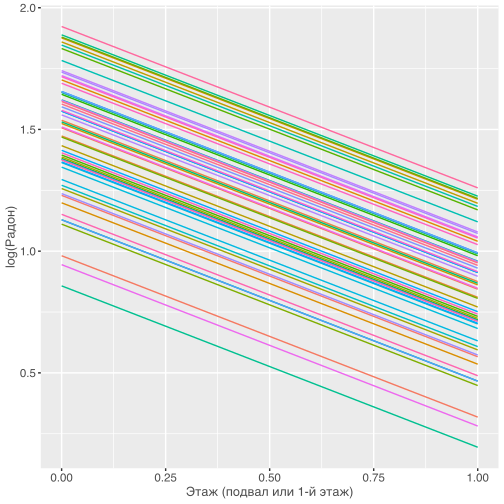

In [203]:
# вспомогательный код для отрисовки всех графиков в SVG
library("Cairo")
options(jupyter.plot_mimetypes = 'image/svg+xml')
options(warn=-1) # ALERT: отключаем предупреждения из-за кириллицы глобально

# предсказываем уровень радона и визуализируем
pr0 <- predict(M0, radon)
ggplot(data=radon, aes(floor, pr0)) + geom_line(aes(color = county), show.legend = FALSE) +
    labs(x="Этаж (подвал или 1-й этаж)", y="log(Радон)")

Но как убедиться, значимо ли отличается свободный коэффициент в данной конкретной группе? Проще всего увидеть это различие на графике, который можно получить при помощи функции `plot_model` из пакета `sjPlot`, который предоставляет [богатые](https://cran.r-project.org/web/packages/sjPlot/vignettes/custplot.html) возможности визуализации моделей.

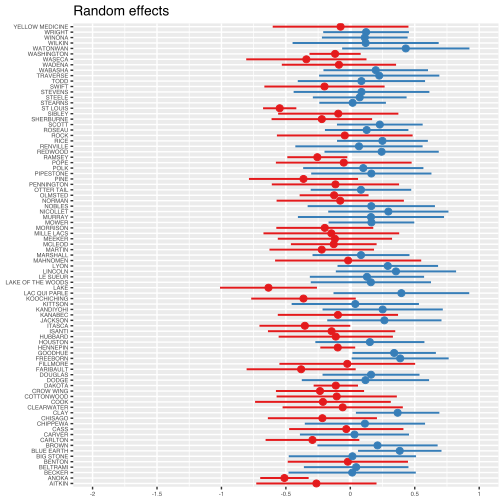

In [204]:
library("sjPlot")
set_theme(axis.textsize = .7)
plot_model(M0, type = "re")

Линиями на этом графиками обозначины доверительные интервалы для величины случайного эффекта в группах. Если какая-то линия не пересекает вертикальную прямую, соответствующую 0, можно говорить о значимости отличия положения регрессионной прямой для соответствующей группы.

В нашем случае, например, содержание радона в зданиях из города под названием [St. Louis](https://en.wikipedia.org/wiki/St._Louis) (на графике обозначен как STLOUIS, 16-й сверху) значимо меньше, чем в среднем.

Другой способ узнать значимость коэффициентов — использовать пакет [lmerTest](https://cran.r-project.org/web/packages/lmerTest/index.html). Достаточно просто импортировать его и вывод модели, получаемый функцией `summary` будет расширен.

Однако сам автор пакета *lme4* остерегает от того, чтобы полагаться на p-values и доверительные интералы при оценке многоуровневых регрессий, на что у него есть ряд аргументов (https://www.zotero.org/ihun/items/itemKey/83U9VC3J).

## Коэффициент детерминации $R^2$ в многоуровневых регрессионных моделях

Вы, возможно, заметили, что в выводе стандартной функции отсутствовала информация о коэффициенте детерминации $R^2$. Причина тому — сложность определения того, что называть $R^2$ для многоуровневых регрессионных моделей. Только в 2012 году Shinichi Nakagawa и Holger Schielzeth (https://www.zotero.org/ihun/items/itemKey/APG47G2P) предложили вариант (дополнен Paul C.D. Johnson в 2014 (https://www.zotero.org/ihun/items/itemKey/XHBNSC9T)), который стал стандартным способом решения этой проблемы. Их предложение состояло в том, чтобы рассчитывать два варианта $R^2$ — предельный и условный. Предельный $R^2$ показывает долю дисперсии, объяснённую только лишь фиксированными эффектами:

$$R^2_{marginal}=\frac{\sigma^2_f }{\sigma^2_f+\sum^{u}_{l=1}\sigma^2_l+\sigma^2_e+\sigma^2_d},$$
где $\sigma^2_f$ — дисперсия, объяснённая фиксированными коэффициентами, $u$ — количество случайных эффектов, $\sigma^2_l$ — дисперсия в группе $l$, $\sigma^2_e$ и $\sigma^2_d$ — дисперия остатков.

Условный $R^2$ показывает долю дисперсии, объяснённую как фиксированными, так и случайными эффектами:

$$R^2_{marginal}=\frac{\sigma^2_f +\sum_{l=1}^{u}\sigma^2_l}{\sigma^2_f+\sum^{u}_{l=1}\sigma^2_l+\sigma^2_e+\sigma^2_d},$$

Давайте рассчитаем предельный и условный $R^2$ самостоятельно (https://www.zotero.org/ihun/items/itemKey/G63MT53D).

Дисперсия, объяснённая фиксированными коэффициентами, оценивается через дисперсию прогнозов для данных, полученном без учёта случайных переменных.

In [118]:
var_f <- var(predict(M0, re.form=NA))

Дисперсию случайных эффектов можно получить, ипользу функцию `VarCorr`.

In [119]:
(vars <- as.data.frame(VarCorr(M0)))

grp,var1,var2,vcov,sdcor
county,(Intercept),NA,0.09948229,0.3154081
Residual,NA,NA,0.52675634,0.7257798


In [120]:
var_l <- vars1[1,4]
var_e <- vars1[2,4]

In [121]:
varf/(varf+var_l+var_e)

[1] 0.08881941

In [122]:
(var_f+var_l)/(var_f+var_l+var_e)

[1] 0.2335667

Кстати говоря, в пакете **sjPlot** функция `tab_model`, которая рисует более опрятную и информативную таблицу, чем обычная `summary`. В ней уже показываются значения $R^2$.

In [123]:
tab_model(M0)

Computing p-values via Wald-statistics approximation (treating t as Wald z).


<table>
  <tbody><tr>
    <th class="thead firsttablerow firsttablecol col1">&nbsp;</th>
    <th colspan="3" class="thead firsttablerow">log radon</th>
  </tr>
  <tr>
    <td class="depvarhead firsttablerow firsttablecol col1">Predictors</td>
    <td class="depvarhead firsttablerow col2">Estimates</td>
    <td class="depvarhead firsttablerow col3">CI</td>
    <td class="depvarhead firsttablerow col4">p</td>
  </tr>
  <tr>
    <td class="tdata firsttablecol col1">(Intercept)</td>
    <td class="tdata centeralign modelcolumn1 col2">1.49</td>
    <td class="tdata centeralign modelcolumn1 col3">1.40&nbsp;–&nbsp;1.59</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.66</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.80&nbsp;–&nbsp;-0.53</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td colspan="4" class="randomparts">Random Effects</td>
  </tr>

  <tr>
    <td class="tdata leftalign summary">σ<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.53</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>00</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.10</td>

  </tr><tr>
    <td class="tdata leftalign summary">ICC <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.16</td>
  </tr><tr>
    <td class="tdata leftalign summary firstsumrow">Observations</td>
    <td class="tdata summary summarydata firstsumrow" colspan="3">919</td>
  </tr>
  <tr>
    <td class="tdata leftalign summary">Marginal R<sup>2</sup> / Conditional R<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.089 / 0.234</td>
  </tr>

</tbody></table>

Как видно, они практически совпадают с тем, что мы рассчитали вручную.

## Модель со случайным углом наклона (Random Slopes Model)

$$y_{ij} = \alpha+\beta_j x_i+\epsilon_i,$$
где
$$\beta_j=a_1+b_1u_j+\eta_{j2}.$$

In [87]:
M1 <- lmer(log_radon ~ floor + (floor - 1 | county), data=radon)
summary(M1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: log_radon ~ floor + (floor - 1 | county)
   Data: radon

     AIC      BIC   logLik deviance df.resid 
  2177.0   2196.2  -1084.5   2169.0      915 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9444 -0.6790  0.0306  0.6896  3.2931 

Random effects:
 Groups   Name  Variance Std.Dev.
 county   floor 0.0924   0.3040  
 Residual       0.6081   0.7798  
Number of obs: 919, groups:  county, 85

Fixed effects:
            Estimate Std. Error t value
(Intercept)  1.36241    0.02818  48.355
floor       -0.53455    0.08396  -6.367

Correlation of Fixed Effects:
      (Intr)
floor -0.336

In [100]:
head(coef(M1)$county)

,(Intercept),floor
AITKIN,1.36241,-0.5338824
ANOKA,1.36241,-0.8334118
BECKER,1.36241,-0.5190840
BELTRAMI,1.36241,-0.5458936
BENTON,1.36241,-0.4988334
BIG STONE,1.36241,-0.5345482


In [102]:
predict(M1, radon)[1]

1 
0.8285274

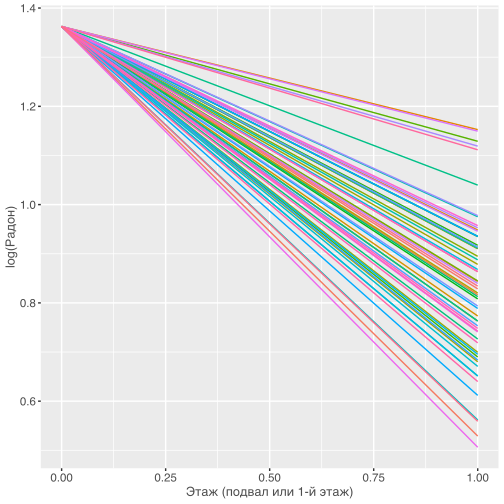

In [169]:
pr1 <- predict(M1, radon)
ggplot(data=radon, aes(floor, pr1)) + geom_line(aes(color = county), show.legend = FALSE) +
    labs(x="Этаж (подвал или 1-й этаж)", y="log(Радон)")

<div class="task">Модель с неизменным свободным коэффициентом, но изменяющимся углом наклон довольно редко используется, но иногда она незаменима. Приведите пример такой ситуации.</div>

## Модель со случайным свободным коэффициентом и углом наклона (Random Intercepts and Slopes Model)

$$y_{ij} = \alpha_j+\beta_j x_i+\epsilon_i,$$
где
$$\alpha_j=a_0+b_0u_j+\eta_{j1},$$
$$\beta_j=a_1+b_1u_j+\eta_{j2}.$$

In [136]:
M2 <- lmer(log_radon ~ floor + (floor|county), data=radon)
tab_model(M2)

Computing p-values via Wald-statistics approximation (treating t as Wald z).
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.


<table>
  <tbody><tr>
    <th class="thead firsttablerow firsttablecol col1">&nbsp;</th>
    <th colspan="3" class="thead firsttablerow">log radon</th>
  </tr>
  <tr>
    <td class="depvarhead firsttablerow firsttablecol col1">Predictors</td>
    <td class="depvarhead firsttablerow col2">Estimates</td>
    <td class="depvarhead firsttablerow col3">CI</td>
    <td class="depvarhead firsttablerow col4">p</td>
  </tr>
  <tr>
    <td class="tdata firsttablecol col1">(Intercept)</td>
    <td class="tdata centeralign modelcolumn1 col2">1.49</td>
    <td class="tdata centeralign modelcolumn1 col3">1.39&nbsp;–&nbsp;1.60</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.65</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.82&nbsp;–&nbsp;-0.49</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td colspan="4" class="randomparts">Random Effects</td>
  </tr>

  <tr>
    <td class="tdata leftalign summary">σ<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.51</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>00</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.11</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>11</sub> <sub>county.floor</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.11</td>

  </tr><tr>
    <td class="tdata leftalign summary">ρ<sub>01</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">-0.37</td>

  </tr><tr>
    <td class="tdata leftalign summary">ICC <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.18</td>
  </tr><tr>
    <td class="tdata leftalign summary firstsumrow">Observations</td>
    <td class="tdata summary summarydata firstsumrow" colspan="3">919</td>
  </tr>
  <tr>
    <td class="tdata leftalign summary">Marginal R<sup>2</sup> / Conditional R<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.086 / 0.257</td>
  </tr>

</tbody></table>

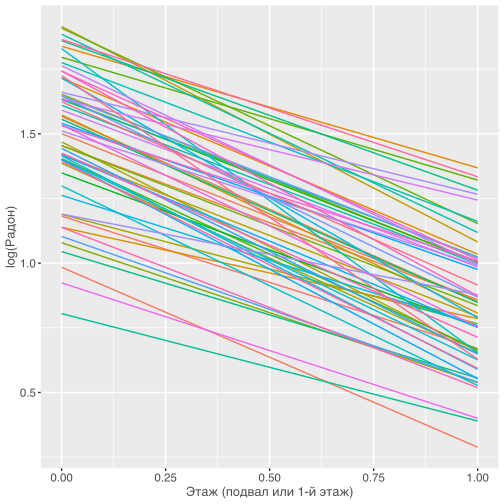

In [167]:
pr2 <- predict(M2, radon)
set_theme(axis.textsize = 1)
ggplot(data=radon, aes(floor, pr2)) + geom_line(aes(color = county), show.legend = FALSE) +
    labs(x="Этаж (подвал или 1-й этаж)", y="log(Радон)")

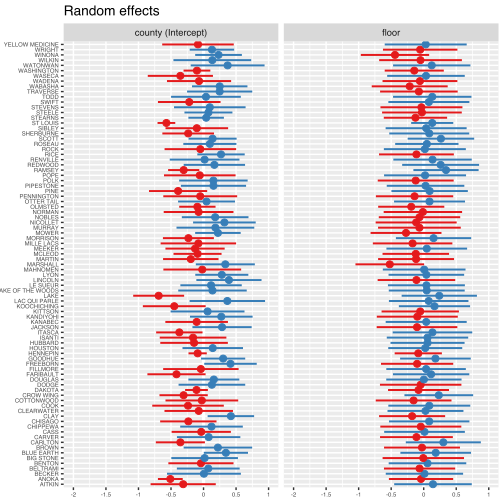

In [147]:
set_theme(axis.textsize = .7)
plot_model(M2, type = "re")

## Сравнение с обычной регрессионной моделью

Сравним выводы многоуровневой регрессионной модели с выводом обычной модели, в которой группирующая переменная присутствует как обычная категориальная переменная с dummy-coding, как это обычно и бывает.

In [62]:
M0_lm <- lm(log_radon ~ floor + county, data=radon)
tab_model(M0_lm)

<table>
  <tbody><tr>
    <th class="thead firsttablerow firsttablecol col1">&nbsp;</th>
    <th colspan="3" class="thead firsttablerow">log radon</th>
  </tr>
  <tr>
    <td class="depvarhead firsttablerow firsttablecol col1">Predictors</td>
    <td class="depvarhead firsttablerow col2">Estimates</td>
    <td class="depvarhead firsttablerow col3">CI</td>
    <td class="depvarhead firsttablerow col4">p</td>
  </tr>
  <tr>
    <td class="tdata firsttablecol col1">(Intercept)</td>
    <td class="tdata centeralign modelcolumn1 col2">0.89</td>
    <td class="tdata centeralign modelcolumn1 col3">0.17&nbsp;–&nbsp;1.60</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>0.015</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.69</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.83&nbsp;–&nbsp;-0.55</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">ANOKA</td>
    <td class="tdata centeralign modelcolumn1 col2">0.04</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.70&nbsp;–&nbsp;0.78</td>
    <td class="tdata centeralign modelcolumn1 col4">0.908</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BECKER</td>
    <td class="tdata centeralign modelcolumn1 col2">0.66</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.43&nbsp;–&nbsp;1.75</td>
    <td class="tdata centeralign modelcolumn1 col4">0.234</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BELTRAMI</td>
    <td class="tdata centeralign modelcolumn1 col2">0.70</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.19&nbsp;–&nbsp;1.59</td>
    <td class="tdata centeralign modelcolumn1 col4">0.125</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BENTON</td>
    <td class="tdata centeralign modelcolumn1 col2">0.57</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.44&nbsp;–&nbsp;1.57</td>
    <td class="tdata centeralign modelcolumn1 col4">0.270</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BIG STONE</td>
    <td class="tdata centeralign modelcolumn1 col2">0.65</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.44&nbsp;–&nbsp;1.74</td>
    <td class="tdata centeralign modelcolumn1 col4">0.242</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BLUE EARTH</td>
    <td class="tdata centeralign modelcolumn1 col2">1.14</td>
    <td class="tdata centeralign modelcolumn1 col3">0.33&nbsp;–&nbsp;1.95</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>0.006</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">BROWN</td>
    <td class="tdata centeralign modelcolumn1 col2">1.11</td>
    <td class="tdata centeralign modelcolumn1 col3">0.10&nbsp;–&nbsp;2.12</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>0.031</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">CARLTON</td>
    <td class="tdata centeralign modelcolumn1 col2">0.16</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.68&nbsp;–&nbsp;1.00</td>
    <td class="tdata centeralign modelcolumn1 col4">0.713</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">CARVER</td>
    <td class="tdata centeralign modelcolumn1 col2">0.68</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.24&nbsp;–&nbsp;1.60</td>
    <td class="tdata centeralign modelcolumn1 col4">0.148</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">CASS</td>
    <td class="tdata centeralign modelcolumn1 col2">0.54</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.42&nbsp;–&nbsp;1.50</td>
    <td class="tdata centeralign modelcolumn1 col4">0.268</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">CHIPPEWA</td>
    <td class="tdata centeralign modelcolumn1 col2">0.87</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.14&nbsp;–&nbsp;1.88</td>
    <td class="tdata centeralign modelcolumn1 col4">0.091</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">…</td>
    <td class="tdata centeralign modelcolumn1 col2">…</td>
    <td class="tdata centeralign modelcolumn1 col3">…</td>
    <td class="tdata centeralign modelcolumn1 col4">…</td>
</tr>

  <tr>
    <td class="tdata firsttablecol col1">WILKIN</td>
    <td class="tdata centeralign modelcolumn1 col2">1.35</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.24&nbsp;–&nbsp;2.95</td>
    <td class="tdata centeralign modelcolumn1 col4">0.096</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">WINONA</td>
    <td class="tdata centeralign modelcolumn1 col2">0.77</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.05&nbsp;–&nbsp;1.58</td>
    <td class="tdata centeralign modelcolumn1 col4">0.064</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">WRIGHT</td>
    <td class="tdata centeralign modelcolumn1 col2">0.78</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.04&nbsp;–&nbsp;1.59</td>
    <td class="tdata centeralign modelcolumn1 col4">0.061</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">YELLOW MEDICINE</td>
    <td class="tdata centeralign modelcolumn1 col2">0.33</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.90&nbsp;–&nbsp;1.56</td>
    <td class="tdata centeralign modelcolumn1 col4">0.601</td>
</tr>
  <tr>
    <td class="tdata leftalign summary firstsumrow">Observations</td>
    <td class="tdata summary summarydata firstsumrow" colspan="3">919</td>
  </tr>
  <tr>
    <td class="tdata leftalign summary">R<sup>2</sup> / adjusted R<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.287 / 0.214</td>
  </tr>

</tbody></table>

## Многоуровневая модель с предиктором группового уровня

Концентрация радона в воздухе зависит от геологической обстановки. Например, граниты, в которых много урана, являются активными источниками радона. В геологии измерение содержания радона в воздухе и воде даже применяется для поиска месторождений урана и тория.

В нашем наборе данных имеется подходящий предиктор группового уровня, показывающий количество урана на уровне округа `Uppm`, где стояли здания, в которых происходило измерение радона. Давайте проверим, действительно ли концентрация урана влияет на уровень радона.

In [156]:
head(radon[, c("county", "Uppm")])

county,Uppm
AITKIN,0.502054
AITKIN,0.502054
AITKIN,0.502054
AITKIN,0.502054
ANOKA,0.428565
ANOKA,0.428565


In [157]:
M3 <- lmer(log_radon ~ floor + Uppm + (1|county), data=radon)
tab_model(M3)

Computing p-values via Wald-statistics approximation (treating t as Wald z).


<table>
  <tbody><tr>
    <th class="thead firsttablerow firsttablecol col1">&nbsp;</th>
    <th colspan="3" class="thead firsttablerow">log radon</th>
  </tr>
  <tr>
    <td class="depvarhead firsttablerow firsttablecol col1">Predictors</td>
    <td class="depvarhead firsttablerow col2">Estimates</td>
    <td class="depvarhead firsttablerow col3">CI</td>
    <td class="depvarhead firsttablerow col4">p</td>
  </tr>
  <tr>
    <td class="tdata firsttablecol col1">(Intercept)</td>
    <td class="tdata centeralign modelcolumn1 col2">0.68</td>
    <td class="tdata centeralign modelcolumn1 col3">0.47&nbsp;–&nbsp;0.88</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.64</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.77&nbsp;–&nbsp;-0.51</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">Uppm</td>
    <td class="tdata centeralign modelcolumn1 col2">0.77</td>
    <td class="tdata centeralign modelcolumn1 col3">0.58&nbsp;–&nbsp;0.96</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td colspan="4" class="randomparts">Random Effects</td>
  </tr>

  <tr>
    <td class="tdata leftalign summary">σ<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.53</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>00</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.02</td>

  </tr><tr>
    <td class="tdata leftalign summary">ICC <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.04</td>
  </tr><tr>
    <td class="tdata leftalign summary firstsumrow">Observations</td>
    <td class="tdata summary summarydata firstsumrow" colspan="3">919</td>
  </tr>
  <tr>
    <td class="tdata leftalign summary">Marginal R<sup>2</sup> / Conditional R<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.169 / 0.203</td>
  </tr>

</tbody></table>

## Многоуровневая модель с эффектом взаимодействия между предиктором группового и индивидуального уровня

In [158]:
M4 <- lmer(log_radon ~ floor * Uppm + (floor|county), data=radon)
tab_model(M4)

Computing p-values via Wald-statistics approximation (treating t as Wald z).
Caution! ICC for random-slope-intercept models usually not meaningful. Use `adjusted = TRUE` to use the mean random effect variance to calculate the ICC. See 'Note' in `?icc`.


<table>
  <tbody><tr>
    <th class="thead firsttablerow firsttablecol col1">&nbsp;</th>
    <th colspan="3" class="thead firsttablerow">log radon</th>
  </tr>
  <tr>
    <td class="depvarhead firsttablerow firsttablecol col1">Predictors</td>
    <td class="depvarhead firsttablerow col2">Estimates</td>
    <td class="depvarhead firsttablerow col3">CI</td>
    <td class="depvarhead firsttablerow col4">p</td>
  </tr>
  <tr>
    <td class="tdata firsttablecol col1">(Intercept)</td>
    <td class="tdata centeralign modelcolumn1 col2">0.56</td>
    <td class="tdata centeralign modelcolumn1 col3">0.37&nbsp;–&nbsp;0.76</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.13</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.61&nbsp;–&nbsp;0.36</td>
    <td class="tdata centeralign modelcolumn1 col4">0.606</td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">Uppm</td>
    <td class="tdata centeralign modelcolumn1 col2">0.89</td>
    <td class="tdata centeralign modelcolumn1 col3">0.70&nbsp;–&nbsp;1.07</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>&lt;0.001</strong></td>
</tr>
  <tr>
    <td class="tdata firsttablecol col1">floor:Uppm</td>
    <td class="tdata centeralign modelcolumn1 col2">-0.49</td>
    <td class="tdata centeralign modelcolumn1 col3">-0.96&nbsp;–&nbsp;-0.03</td>
    <td class="tdata centeralign modelcolumn1 col4"><strong>0.037</strong></td>
</tr>
  <tr>
    <td colspan="4" class="randomparts">Random Effects</td>
  </tr>

  <tr>
    <td class="tdata leftalign summary">σ<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.52</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>00</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.01</td>

  </tr><tr>
    <td class="tdata leftalign summary">τ<sub>11</sub> <sub>county.floor</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.08</td>

  </tr><tr>
    <td class="tdata leftalign summary">ρ<sub>01</sub> <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.58</td>

  </tr><tr>
    <td class="tdata leftalign summary">ICC <sub>county</sub></td>
    <td class="tdata summary summarydata" colspan="3">0.02</td>
  </tr><tr>
    <td class="tdata leftalign summary firstsumrow">Observations</td>
    <td class="tdata summary summarydata firstsumrow" colspan="3">919</td>
  </tr>
  <tr>
    <td class="tdata leftalign summary">Marginal R<sup>2</sup> / Conditional R<sup>2</sup></td>
    <td class="tdata summary summarydata" colspan="3">0.172 / 0.218</td>
  </tr>

</tbody></table>

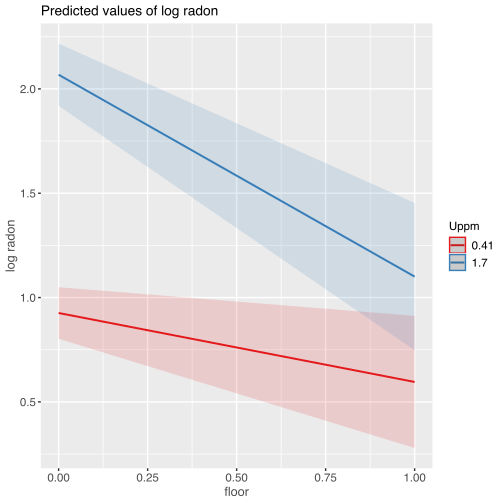

In [171]:
plot_model(M4, type = "int")

## Проверка многоуровновости при помощи ICC

Для того, чтобы узнать, следует ли в вашем случае строит многоуровневую модель, или можно обойтись обычно, следует рассчитать коэффициент внутриклассовой корреляции (ICC). ICC вычисляется как отношение межгрупповой дисперсии к общей дисперсии (то есть к сумме межгрупповой и внутригрупповой диспесий), а его формула выглядит следующим образом:
$$ICC=\frac{st.dev(intercept)^2}{st.dev(intercept)^2 + st.dev(residual)^2}=$$
$$\frac{variance (intercept)}{(variance (intercept)+variance (residual)}$$
ICC можно интерпретировать как долю дисперсии, объясняемой многоуровневостью модели, это доля групповой дисперсии в общей дисперсии. Таким образом, ICC описывает, насколько различаются группы между собой группы. ICC больше 0.1 обычно считается достаточным для построения многоуровневых моделей, хотя чётких критериев тут нет.

Обычно ICC рассчитывается для нулевой модели (её ещё назвают пустой моделью), т.е. модели, в которой заложена только группирующая переменная. Фактически, это обычная модель ANOVA.

In [42]:
empty_model <- lmer (log_radon ~ 1 + (1 | county), data=radon)
summary(empty_model)

Linear mixed model fit by REML ['lmerMod']
Formula: log_radon ~ 1 + (1 | county)
   Data: radon

REML criterion at convergence: 2184.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6880 -0.5884  0.0323  0.6444  3.4186 

Random effects:
 Groups   Name        Variance Std.Dev.
 county   (Intercept) 0.08861  0.2977  
 Residual             0.58686  0.7661  
Number of obs: 919, groups:  county, 85

Fixed effects:
            Estimate Std. Error t value
(Intercept)    1.350      0.047   28.72

In [51]:
0.2977^2 / (0.2977^2 + 0.7661^2)

[1] 0.1311928

Рассчитать ICC также можно при помощи функции `icc` из пакета **sjstats**, который помимо неё содержит множество разнообразных функций для работы с регрессионными моделями.

In [54]:
library("sjstats")

icc(empty_model)

Intraclass Correlation Coefficient for Linear mixed model

Family : gaussian (identity)
Formula: log_radon ~ 1 + (1 | county)

  ICC (county): 0.1312

Как видно, эти значения почти плоностью повторяют рассчитанные вручную.



## Ограничения многоуровневой регрессионной модели

У многоуровневой регрессионной модели все те же ограничения, что и обычной, плюс несколько специфических.

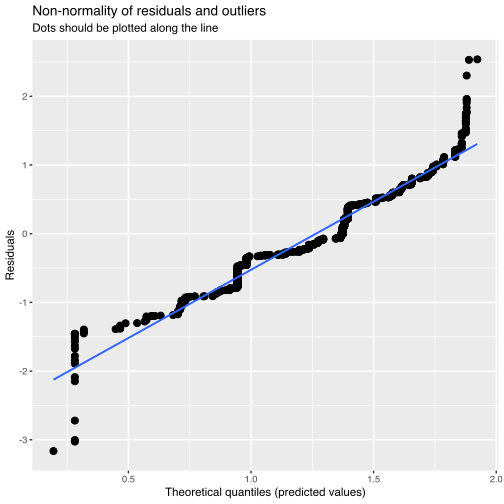

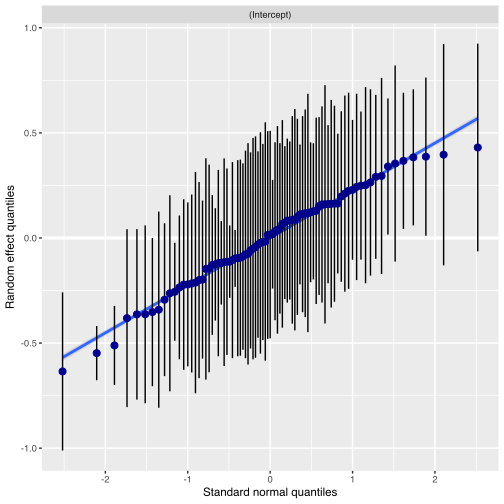

[[1]]

[[2]]
[[2]]$county


[[3]]

[[4]]


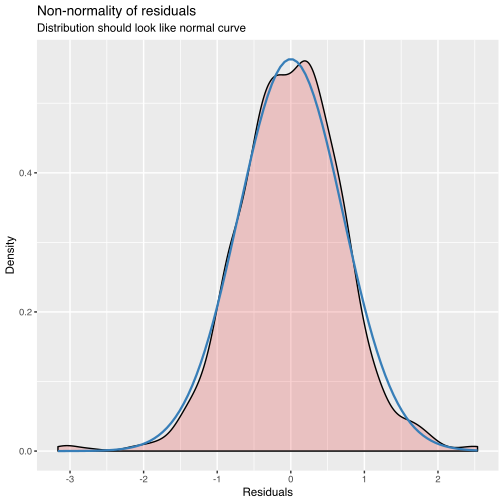

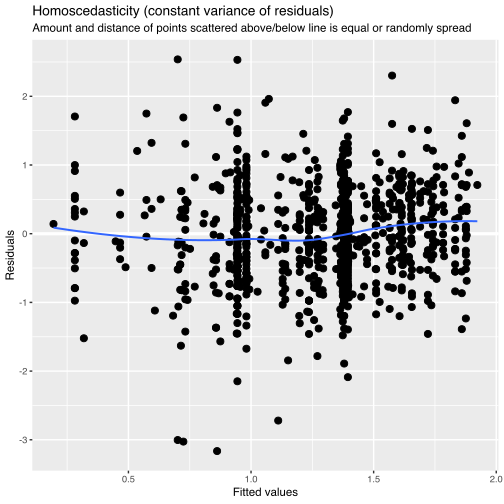

In [126]:
plot_model(M0, type = "diag")

## Сравнение моделей

Вложенные многоуровневые модели можно сравнивать между собой также, как и обычные, при помощи дисперсионного анализа (`anova(model1, model2)`). Небольшая деталь состоит в том, что при сравнение моделей нужно обучать их с параметром `REML = F`. Что такое REML можно почитать в статье "A few words about REML" (https://www.zotero.org/ihun/items/itemKey/Q2YGKW2X).

In [186]:
M0_ml <- lmer(log_radon ~ floor + (1 | county), data=radon, REML = F)
M2_ml <- lmer(log_radon ~ floor + (floor | county), data=radon, REML = F)

anova(M0_ml, M2_ml)

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
M0_ml,4,2097.707,2117.000,-1044.853,2089.707,NA,NA,NA
M2_ml,6,2099.043,2127.982,-1043.521,2087.043,2.664119,2,0.2639332


Нельзя сказать, что модель со случайным углом наклона и свободным коэффициентом лучше, чем модель со случайным свободным коэффициентом (0.2639332 > 0.05, AIC(M0_ml) < AIC(M2_ml)).

## Обобщённые многоуровневые линейные модели

### Многоуровневая логистическая регрессия
Конечно же, можно строить не только многоуровневые линейные регрессионные модели, но и логистические. Это необходимо, когда зависимая переменная принимает только два возможных значения.

In [ ]:
log_model = glmer(y_bin ~ x + (1|group), family = binomial(link="logit"))

Многоуровневая логистическая регрессия не сильно отличается от линейной, но необходимо помнить несколько нюансов. Во-первых, ICC для такой модели рассчитывается [иначе](https://www.barelysignificant.com/post/icc/), не так как для линейной: $\dfrac{st.dev(intercept)^2}{st.dev(intercept)^2 + \frac{\pi^2}{3}}$.

Во-вторых, необходимо помнить, что значения коэффициентов являются натуральным логарифмом отношения шансов ([подробнее](https://en.wikipedia.org/wiki/Odds_ratio)).

### Порядковая регрессия

Если и более экзотические модели, например [порядковая логистическая регрессия](https://en.wikipedia.org/wiki/Ordered_logit). Она применяется, когда зависимая переменаая представляет измерена в порядковой шкале, наприме, шкале Лайкерта. Если переменная номинальная, стоит использовать многоуровневую мультиноминальную логистическую регрессию.

In [199]:
library("ordinal")
library("foreign")

ess_data <- read.spss("ESS6.sav", to.data.frame = T)

optftr <- factor(ess_data$optftr, ordered = T)
#optftr <- factor(ess_data$optftr, levels=rev(levels(ess_data$optftr)), ordered=T)

ordered_log <- clmm(optftr ~ agea + (1|cntry), ess_data, link = "logit", threshold = "equidistant")
summary(ordered_log)

Всё это работает крайне долго, так что я бы не рисковал запускать это будучи на паре.

Коэффициенты в этой модели интерпретируются почти так же, как и для бинарной логистической регрессии, за исключением того, что вместо опоры на одну базовую категорию, мы противопоставляем каждую категорию всем предыдущим. Коэффициенты этой модели следует интерпретировать как логарифм шансов, что Y относится к данной категории и всем предыдущим, а не к тем, что выше.

## Самостоятельная

Ваша задача — проанализировать результаты [European Social Survey шестой волны](http://www.europeansocialsurvey.org/data/download.html?r=6) или [World Values Survey](http://www.worldvaluessurvey.org/wvs.jsp). ESS — это сравнительное межстрановое трендовое исследование установок, взглядов, ценностей и поведения населения Европы, которое проводится почти во всех европейских странах каждые два года, начиная с 2002, методом опроса населения 15 лет и старше по случайной репрезентативной выборке населения в каждой стране с помощью личных интервью на дому у респондентов. WVS — тоже весьма похожий исследовательский проект, объединяющий социологов по всему миру, которые изучают ценности и их воздействие на социальную и культурную жизнь. WVS провёл социологические исследования уже в 97 странах.

Продемонструйте навыки использования многомерной регресси на этих данных:
* определите зависимую и независимые переменные;
* определите переменные индивидуального и группового уровня;
* рассчитайте ICC и решите, нужна ли в вашем случае многоуровневость;
* если многоуровневость нужна, постройте регрессионную модель с разными случайными коэффициентами и выберете лучшую;
* визуализируйте эффекты модели и дайте им интерпретацию.

Описание всех переменных из ESS доступно в [протоколе исследования](http://www.europeansocialsurvey.org/docs/round6/survey/ESS6_data_protocol_e01_4.pdf), сами данные можно скачать по [ссылке](https://drive.google.com/file/d/0B-JqczPqzcEZbUtCcnFOWWM3LUU/view?usp=sharing). Для переменных из WVS также есть описание [на сайте](http://www.worldvaluessurvey.org/WVSDocumentationWV6.jsp) (раздел "Questionnaire") и [данные](https://www.dropbox.com/s/q6a07fwdr80brnb/WV6_Data_spss_v_2015_04_18.sav?dl=0).

In [ ]:
library("foreign")
ess = read.spss("ESS6.sav", use.value.labels = T, to.data.frame=T)
wws = read.spss("WV6_Data_spss_v_2015_04_18.sav", use.value.labels = T, to.data.frame=T)